In [1]:
#Import Dependencies
from pylab import *
import os
import pandas as pd
import librosa
import librosa.display
import glob
import random
from IPython.display import Audio
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import joblib
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, metrics
import tensorflow
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout,Conv1D,MaxPooling1D, BatchNormalization
from tensorflow.keras.regularizers import l2
import h5py
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import f1_score
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from keras.models import load_model

In [2]:
!pip install import-ipynb
import import_ipynb

In [3]:
from ClassesSpeechEmotion import *

importing Jupyter notebook from ClassesSpeechEmotion.ipynb


##### Get and preprosses datasets

In [4]:
obj = SpeechEmotion()
# RAVDASS AUDIO SET
file_name_df = obj.get_data("data/emotion_speech/.", 'emotion_speech')
file_name_df

,file_name,encoding,ID,dir
0,03-01-01-01-01-01-01.wav,03-01-01-01-01-01-01.wav,0,emotion_speech
1,03-01-01-01-01-01-02.wav,03-01-01-01-01-01-02.wav,1,emotion_speech
2,03-01-01-01-01-01-03.wav,03-01-01-01-01-01-03.wav,2,emotion_speech
3,03-01-01-01-01-01-04.wav,03-01-01-01-01-01-04.wav,3,emotion_speech
4,03-01-01-01-01-01-05.wav,03-01-01-01-01-01-05.wav,4,emotion_speech
...,...,...,...,...
1435,03-01-08-02-02-02-20.wav,03-01-08-02-02-02-20.wav,1435,emotion_speech
1436,03-01-08-02-02-02-21.wav,03-01-08-02-02-02-21.wav,1436,emotion_speech
1437,03-01-08-02-02-02-22.wav,03-01-08-02-02-02-22.wav,1437,emotion_speech
1438,03-01-08-02-02-02-23.wav,03-01-08-02-02-02-23.wav,1438,emotion_speech


In [5]:
# RAVDASS AUDIO SET
ddf = obj.fix_ravdass_data(file_name_df, True)
ddf

,file_name,ID,dir,Class,Gender,Emotion
0,03-01-01-01-01-01-01.wav,0,emotion_speech,01,0,neutral
1,03-01-01-01-01-01-02.wav,1,emotion_speech,01,1,neutral
2,03-01-01-01-01-01-03.wav,2,emotion_speech,01,0,neutral
3,03-01-01-01-01-01-04.wav,3,emotion_speech,01,1,neutral
4,03-01-01-01-01-01-05.wav,4,emotion_speech,01,0,neutral
...,...,...,...,...,...,...
1435,03-01-08-02-02-02-20.wav,1435,emotion_speech,08,1,surprise
1436,03-01-08-02-02-02-21.wav,1436,emotion_speech,08,0,surprise
1437,03-01-08-02-02-02-22.wav,1437,emotion_speech,08,1,surprise
1438,03-01-08-02-02-02-23.wav,1438,emotion_speech,08,0,surprise


In [6]:
obj.save_csv('data/gender_feature_data.csv', ddf, True)
train = obj.read_csv('data/gender_feature_data.csv')
train

,Unnamed: 0,file_name,ID,dir,Class,Gender,Emotion
0,0,03-01-01-01-01-01-01.wav,0,emotion_speech,1,0,neutral
1,1,03-01-01-01-01-01-02.wav,1,emotion_speech,1,1,neutral
2,2,03-01-01-01-01-01-03.wav,2,emotion_speech,1,0,neutral
3,3,03-01-01-01-01-01-04.wav,3,emotion_speech,1,1,neutral
4,4,03-01-01-01-01-01-05.wav,4,emotion_speech,1,0,neutral
...,...,...,...,...,...,...,...
1435,1435,03-01-08-02-02-02-20.wav,1435,emotion_speech,8,1,surprise
1436,1436,03-01-08-02-02-02-21.wav,1436,emotion_speech,8,0,surprise
1437,1437,03-01-08-02-02-02-22.wav,1437,emotion_speech,8,1,surprise
1438,1438,03-01-08-02-02-02-23.wav,1438,emotion_speech,8,0,surprise


##### Feature Data

In [7]:
temp = train.apply(obj.parser, axis=1,flag_gender = True)

In [8]:
features_df = pd.DataFrame(data=[x[0] for x in temp])
features_df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-700.398926,58.630211,-3.025852,16.040241,4.248529,3.869935,-6.381716,-0.188635,-13.735004,-0.319724,...,-0.048826,-0.009966,0.043364,-0.118930,0.086474,0.020726,-0.009119,0.028229,0.139806,-0.038748
1,-653.169006,58.028076,-12.581207,11.818786,-7.681562,-0.617142,-8.337758,-5.823570,-6.547592,1.458057,...,-0.151122,0.047958,-0.441313,-0.270397,-0.072456,-0.126832,0.204340,0.047925,-0.173506,0.012698
2,-617.052307,60.103363,-5.984258,13.886285,1.120427,0.511750,-14.841358,-4.016369,-5.575839,-6.309851,...,0.002693,0.189555,0.018517,0.039327,0.347483,0.340563,0.208704,-0.167646,0.078711,-0.066652
3,-698.721130,47.088486,-11.333612,12.963089,-8.005651,-1.252229,-10.009067,-9.434125,-10.318875,-0.864674,...,-0.421341,0.171895,-0.238024,-0.276562,-0.140813,0.068313,-0.155587,-0.085290,-0.532761,-0.309993
4,-715.922607,71.976791,4.457525,18.602497,8.404046,3.621954,-1.974365,0.022673,-2.678084,4.232803,...,0.384698,-0.165444,-0.215464,0.402756,0.292296,-0.007742,0.232237,-0.152113,-0.026279,0.499299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-601.486267,38.448559,-22.685497,8.910748,-11.831654,-2.034770,-15.193533,-13.168941,-8.239002,-0.204330,...,-0.281474,-0.249924,0.068452,-0.364816,0.028009,0.067315,-0.017546,0.312544,-0.114228,-0.213653
1436,-517.663330,48.196037,-7.373577,14.659329,-1.055892,-2.390893,-10.052640,-4.078946,-18.799496,3.597913,...,0.028267,0.212138,-0.008922,0.079820,0.187155,-0.014433,-0.040827,0.515448,0.224131,-0.227128
1437,-540.463501,30.472212,-19.334326,-0.281677,-8.792910,-2.494793,-18.783411,-5.102601,-17.537779,3.291185,...,-0.126333,-0.459913,-0.113637,0.126911,0.053742,-0.225688,-0.213271,-0.129235,-0.121047,-0.032382
1438,-528.762939,37.675552,-15.573382,2.211398,-5.781027,-1.257423,-13.559296,-4.513864,-13.425216,-1.664613,...,-0.158397,0.212726,0.028362,-0.030429,0.146753,-0.286557,-0.140227,-0.119282,-0.054225,0.139255


In [9]:
features_df["label"] = [x[1] for x in temp]
features_df["emotions"] = [x[2] for x in temp]

In [10]:
#Write to CSV
obj.save_csv('data/gender_data.csv', features_df, False)

In [5]:
df =obj.read_csv('data/gender_data.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,label,emotions
0,-700.398926,58.630211,-3.025852,16.040241,4.248529,3.869935,-6.381716,-0.188635,-13.735004,-0.319724,...,0.043364,-0.118930,0.086474,0.020726,-0.009119,0.028229,0.139806,-0.038748,0,neutral
1,-653.169006,58.028076,-12.581207,11.818786,-7.681562,-0.617142,-8.337758,-5.823570,-6.547592,1.458057,...,-0.441313,-0.270397,-0.072456,-0.126832,0.204340,0.047925,-0.173506,0.012698,1,neutral
2,-617.052307,60.103363,-5.984258,13.886285,1.120427,0.511750,-14.841358,-4.016369,-5.575839,-6.309851,...,0.018517,0.039327,0.347483,0.340563,0.208704,-0.167646,0.078711,-0.066652,0,neutral
3,-698.721130,47.088486,-11.333612,12.963089,-8.005651,-1.252229,-10.009067,-9.434125,-10.318875,-0.864674,...,-0.238024,-0.276562,-0.140813,0.068313,-0.155587,-0.085290,-0.532761,-0.309993,1,neutral
4,-715.922607,71.976791,4.457525,18.602497,8.404046,3.621954,-1.974365,0.022673,-2.678084,4.232803,...,-0.215464,0.402756,0.292296,-0.007742,0.232237,-0.152113,-0.026279,0.499299,0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-601.486267,38.448559,-22.685497,8.910748,-11.831654,-2.034770,-15.193533,-13.168941,-8.239002,-0.204330,...,0.068452,-0.364816,0.028009,0.067315,-0.017546,0.312544,-0.114228,-0.213653,1,surprise
1436,-517.663330,48.196037,-7.373577,14.659329,-1.055892,-2.390893,-10.052640,-4.078946,-18.799496,3.597913,...,-0.008922,0.079820,0.187155,-0.014433,-0.040827,0.515448,0.224131,-0.227128,0,surprise
1437,-540.463501,30.472212,-19.334326,-0.281677,-8.792910,-2.494793,-18.783411,-5.102601,-17.537779,3.291185,...,-0.113637,0.126911,0.053742,-0.225688,-0.213271,-0.129235,-0.121047,-0.032382,1,surprise
1438,-528.762939,37.675552,-15.573382,2.211398,-5.781027,-1.257423,-13.559296,-4.513864,-13.425216,-1.664613,...,0.028362,-0.030429,0.146753,-0.286557,-0.140227,-0.119282,-0.054225,0.139255,0,surprise


In [6]:
df.drop(inplace=True, columns=["emotions"])
target = df["label"]
data = df.drop("label", axis=1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-700.398926,58.630211,-3.025852,16.040241,4.248529,3.869935,-6.381716,-0.188635,-13.735004,-0.319724,...,-0.048826,-0.009966,0.043364,-0.118930,0.086474,0.020726,-0.009119,0.028229,0.139806,-0.038748
1,-653.169006,58.028076,-12.581207,11.818786,-7.681562,-0.617142,-8.337758,-5.823570,-6.547592,1.458057,...,-0.151122,0.047958,-0.441313,-0.270397,-0.072456,-0.126832,0.204340,0.047925,-0.173506,0.012698
2,-617.052307,60.103363,-5.984258,13.886285,1.120427,0.511750,-14.841358,-4.016369,-5.575839,-6.309851,...,0.002693,0.189555,0.018517,0.039327,0.347483,0.340563,0.208704,-0.167646,0.078711,-0.066652
3,-698.721130,47.088486,-11.333612,12.963089,-8.005651,-1.252229,-10.009067,-9.434125,-10.318875,-0.864674,...,-0.421341,0.171895,-0.238024,-0.276562,-0.140813,0.068313,-0.155587,-0.085290,-0.532761,-0.309993
4,-715.922607,71.976791,4.457525,18.602497,8.404046,3.621954,-1.974365,0.022673,-2.678084,4.232803,...,0.384698,-0.165444,-0.215464,0.402756,0.292296,-0.007742,0.232237,-0.152113,-0.026279,0.499299


##### Models

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [8]:
obj_model = Models()
X_train_scaled, X_test_scaled = obj_model.convert_data_to_scaler(X_train, X_test, 'models/gender_scaler.sav')  

##### RandomForestClassifier

In [9]:
exp =['Male', 'Female']

Accuracy Classifier: 98.06%
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       177
           1       0.96      1.00      0.98       183

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



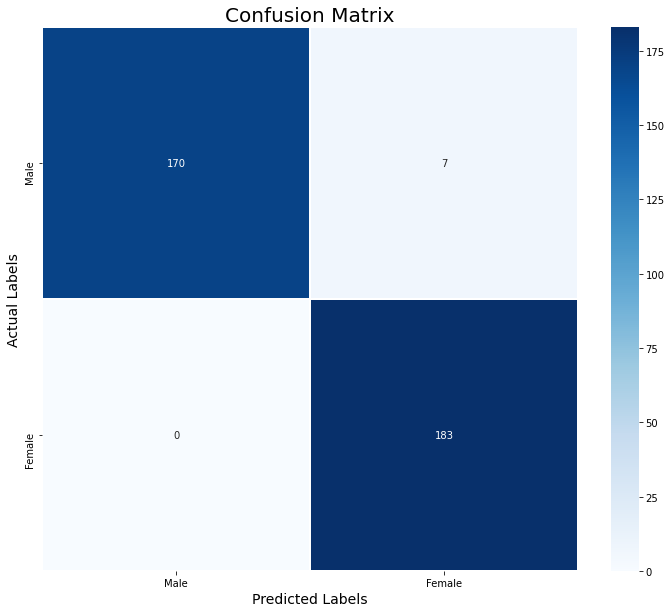

In [10]:
clf = obj_model.random_forest_classifier(X_train_scaled, y_train)
obj_model.model_evaluation(clf, X_test_scaled, y_test, exp)
obj_model.save_classifier(clf,'models/RandomForestClassifier_gender_model.sav')

##### DecisionTreeClassifier

Accuracy Classifier: 91.67%
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       177
           1       0.91      0.92      0.92       183

    accuracy                           0.92       360
   macro avg       0.92      0.92      0.92       360
weighted avg       0.92      0.92      0.92       360



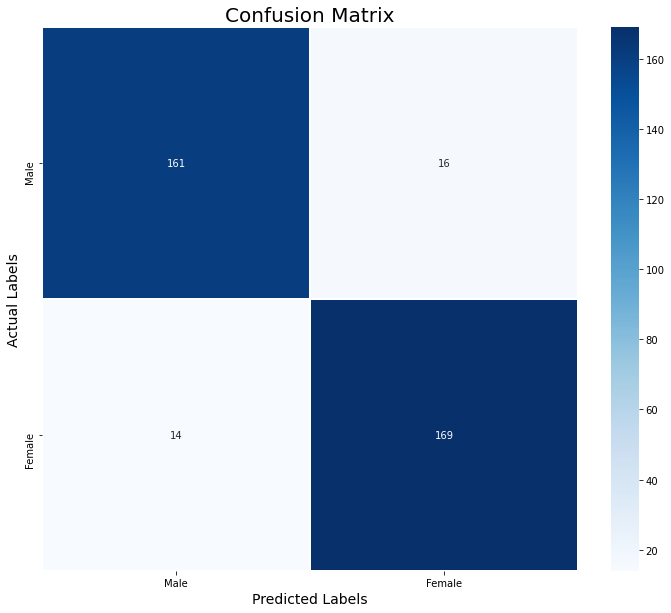

In [12]:
clf = obj_model.decision_tree_classifier(X_train_scaled, y_train)
obj_model.model_evaluation(clf, X_test_scaled, y_test, exp)
obj_model.save_classifier(clf, 'models/DecisionTreeClassifier_gender_model.sav')

##### KNeighborsClassifier

Accuracy Classifier: 99.17%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       177
           1       1.00      0.98      0.99       183

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



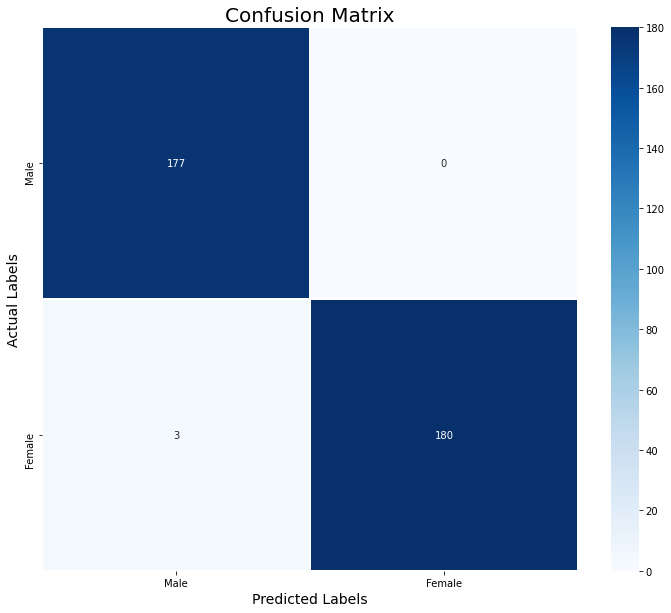

In [13]:
clf = obj_model.knn_classifier(X_train_scaled, y_train)
obj_model.model_evaluation(clf, X_test_scaled, y_test, exp)
obj_model.save_classifier(clf, 'models/KNeighborsClassifier_gender_model.sav')

##### SVCclassifier

Accuracy Classifier: 100.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       177
           1       1.00      1.00      1.00       183

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360



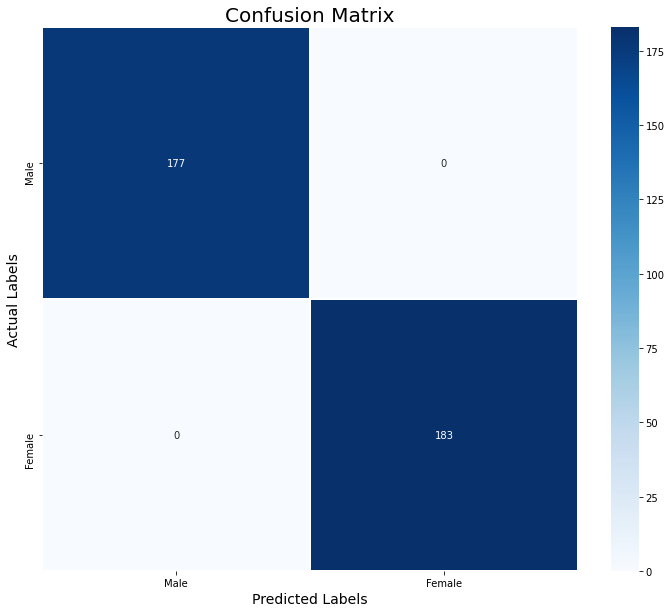

In [14]:
clf = obj_model.svc_classifier(X_train_scaled, y_train)
obj_model.model_evaluation(clf, X_test_scaled, y_test, exp)
obj_model.save_classifier(clf, 'models/SVCclassifier_gender_model.sav')

##### Deep Learning 

In [21]:
# One hot lables
encoder, y_train_oneHot, y_test_oneHot = obj_model.one_hot(y_train, y_test)
# Callbacks
F1 = F1(X_train_scaled, y_train_oneHot,X_test_scaled,y_test_oneHot)
mc = ModelCheckpoint('models/best_gender_model.h5', monitor= 'f1_score') 
callback = tf.keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)
all= [F1,mc]
# Create model
model = obj_model.get_model( y_train_oneHot, X_train_scaled)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               33024     
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 514       
                                                                 
Total params: 99,330
Trainable params: 99,330
Non-trainable params: 0
_________________________________________________________________


C:\anaconda39\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [22]:
history = obj_model.fit_model(model, X_train_scaled, y_train_oneHot, X_test_scaled,y_test_oneHot, all)

Epoch 1/140
34/34 [==============================] - 1s 19ms/step - loss: 20.9241 - accuracy: 0.7343 - val_loss: 19.9675 - val_accuracy: 0.8917
Epoch 2/140
34/34 [==============================] - 0s 8ms/step - loss: 19.2656 - accuracy: 0.8648 - val_loss: 18.4376 - val_accuracy: 0.9361
Epoch 3/140
34/34 [==============================] - 0s 8ms/step - loss: 17.7501 - accuracy: 0.9139 - val_loss: 16.9667 - val_accuracy: 0.9528
Epoch 4/140
34/34 [==============================] - 0s 7ms/step - loss: 16.3053 - accuracy: 0.9241 - val_loss: 15.5603 - val_accuracy: 0.9583
Epoch 5/140
34/34 [==============================] - 0s 9ms/step - loss: 14.9169 - accuracy: 0.9417 - val_loss: 14.2113 - val_accuracy: 0.9639
Epoch 6/140
34/34 [==============================] - 0s 9ms/step - loss: 13.6032 - accuracy: 0.9574 - val_loss: 12.9368 - val_accuracy: 0.9667
Epoch 7/140
34/34 [==============================] - 0s 9ms/step - loss: 12.3557 - accuracy: 0.9611 - val_loss: 11.7291 - val_accuracy: 0.969

34/34 [==============================] - 0s 7ms/step - loss: 0.0667 - accuracy: 0.9991 - val_loss: 0.0711 - val_accuracy: 0.9944
Epoch 70/140
34/34 [==============================] - 0s 7ms/step - loss: 0.0661 - accuracy: 0.9991 - val_loss: 0.0689 - val_accuracy: 0.9972
Epoch 71/140
34/34 [==============================] - 0s 7ms/step - loss: 0.0652 - accuracy: 1.0000 - val_loss: 0.0676 - val_accuracy: 0.9972
Epoch 72/140
34/34 [==============================] - 0s 7ms/step - loss: 0.0647 - accuracy: 0.9991 - val_loss: 0.0686 - val_accuracy: 0.9972
Epoch 73/140
34/34 [==============================] - 0s 7ms/step - loss: 0.0639 - accuracy: 1.0000 - val_loss: 0.0677 - val_accuracy: 0.9917
Epoch 74/140
34/34 [==============================] - 0s 7ms/step - loss: 0.0632 - accuracy: 1.0000 - val_loss: 0.0660 - val_accuracy: 0.9972
Epoch 75/140
34/34 [==============================] - 0s 7ms/step - loss: 0.0635 - accuracy: 0.9991 - val_loss: 0.0648 - val_accuracy: 0.9972
Epoch 76/140
34/34 

34/34 [==============================] - 0s 6ms/step - loss: 0.0473 - accuracy: 1.0000 - val_loss: 0.0495 - val_accuracy: 0.9972
Epoch 138/140
34/34 [==============================] - 0s 6ms/step - loss: 0.0478 - accuracy: 1.0000 - val_loss: 0.0498 - val_accuracy: 0.9972
Epoch 139/140
34/34 [==============================] - 0s 6ms/step - loss: 0.0468 - accuracy: 1.0000 - val_loss: 0.0481 - val_accuracy: 0.9972
Epoch 140/140
34/34 [==============================] - 0s 6ms/step - loss: 0.0465 - accuracy: 1.0000 - val_loss: 0.0494 - val_accuracy: 0.9972


In [23]:
obj_model.save_model_and_history( model, history, "models/gender_model.h5", 'models/gender_model_history.npy')    

In [24]:
model, history = obj_model.load_model_and_history("models/gender_model.h5", 'models/gender_model_history.npy')

12/12 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 0.9972
Accuracy of our model on test data :  99.72222447395325 %


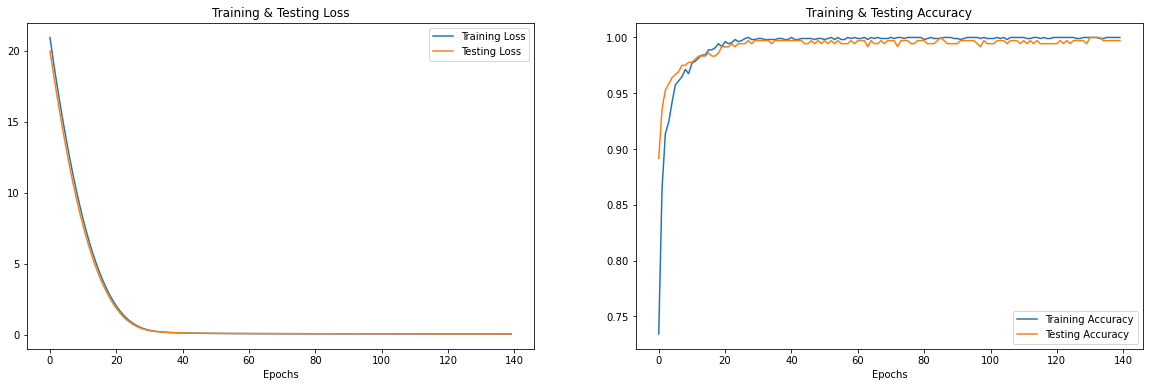

In [25]:
obj_model.show_loss_and_accuracy(model, history, X_test_scaled, y_test_oneHot)

In [26]:
df, y_pred, y_test = obj_model.test_predict(model, encoder, X_test_scaled, y_test_oneHot)
df.head(10)

,Predicted Labels,Actual Labels
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,1,1
9,0,0


Accuracy Classifier: 99.72%
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       177
           1       1.00      0.99      1.00       183

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360



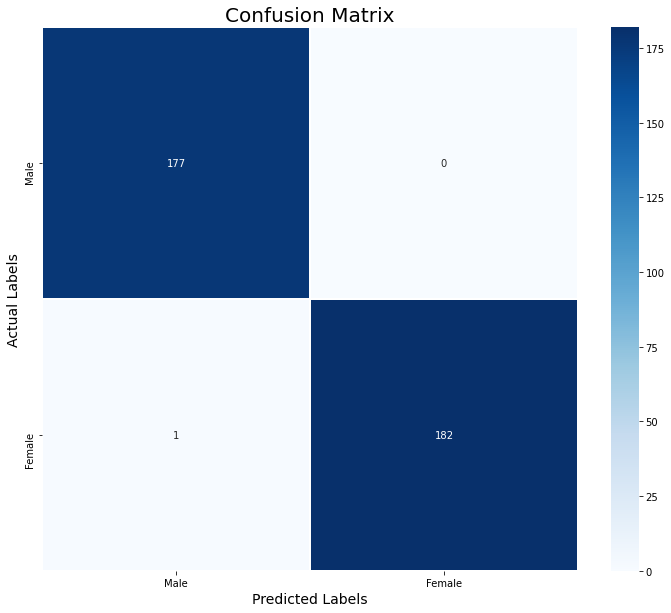

In [27]:
print("Accuracy Classifier: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))
print(classification_report(y_test, y_pred))
obj_model.get_confusion_matrix(y_test, y_pred, exp)